# Project: Machine Learning

**Instructions for Students:**

Please carefully follow these steps to complete and submit your project:

1. **Completing the Project**: You are required to work on and complete all tasks in the provided project. Be disciplined and ensure that you thoroughly engage with each task.
   
2. **Creating a Google Drive Folder**: Each of you must create a new folder on your Google Drive if you haven't already. This will be the repository for all your completed assignment and project files, aiding you in keeping your work organized and accessible.
   
3. **Uploading Completed Project**: Upon completion of your project, make sure to upload all necessary files, involving codes, reports, and related documents into the created Google Drive folder. Save this link in the 'Student Identity' section and also provide it as the last parameter in the `submit` function that has been provided.
   
4. **Sharing Folder Link**: You're required to share the link to your project Google Drive folder. This is crucial for the submission and evaluation of your project.
   
5. **Setting Permission toPublic**: Please make sure your Google Drive folder is set to public. This allows your instructor to access your solutions and assess your work correctly.

Adhering to these procedures will facilitate a smooth project evaluation process for you and the reviewers.

## Project Description

In this Machine Learning Project, you will create your own supervised Machine Learning (ML) model. We will use the full FIFA21 Dataset and we will identify players that are above average.

We will use the column "Overall" with a treshold of 75 to define players that are 'Valuable'. This will become our target output which we need for a supervised ML model. Because we use the "Overall" as our target output, you cannot use "Overall" in your features, this will be explained further below.

This project will provide a comprehensive overview of your abilities in machine learning, from understanding the problem, choosing the right model, training, and optimizing it.

## Grading Criteria

Your score will be awarded based on the following criteria:
* 100: The model has an accuracy of more than 80% and an F1 score of more than 85%. This model is excellent and demonstrates a strong understanding of the task.
* 90: The model has an accuracy of more than 75% and an F1 score of more than 80%. This model is very good, with some room for improvement.
* 80: The model has an accuracy of more than 70% and an F1 score between 70% and 80%. This model is fairly good but needs improvement in balancing precision and recall.
* 70: The model has an accuracy of more than 65% and an F1 score between 60% and 70%. This model is below average and needs significant improvement.
* 60 or below: The model has an accuracy of less than 65% or an F1 score of less than 60%, or the student did not submit the accuracy and F1 score. This model is poor and needs considerable improvement.

Rmember to make a copy of this notebook in your Google Drive and work in your own copy.

Happy modeling!

>Note: If you get the accuracy of 100% and F1 score of 100%, while it may earn you good grades, it's an indication of overfitting.

In [ ]:
# Write any package/module installation that you need
# pip install goes here, this helps declutter your output below
!pip install lazypredict

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from imblearn.over_sampling import SMOTE
from lazypredict.Supervised import LazyClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import OrdinalEncoder, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [ ]:
plt.style.use('seaborn-v0_8')

## Load the dataset and clean it

In this task, you will prepare and load your dataset. You need to download the full FIFA 21 Dataset from the link here: [Kaggle FIFA Player Stats Database](https://www.kaggle.com/datasets/bryanb/fifa-player-stats-database?resource=download&select=FIFA21_official_data.csv).

>Note: Make sure you download FIFA 21 dataset.
>
>![FIFA21 Dataset](https://storage.googleapis.com/rg-ai-bootcamp/projects/fifa21_dataset-min.png)

After you download the dataset, you will then import the dataset then you will clean the data. For example there may be some empty cell in the dataset which you need to fill. Maybe there are also data that you need to convert to numeric value for analysis. Identify the data that is incomplete and fix them.

In the code block below, you can use the comments to guide you on what to do.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 🎯 **Step 1: Load dataset**
---

In [ ]:
# Load your data

path =  '/content/drive/MyDrive/SKILL ACADEMY/PROJECT 2/Dataset/FIFA21_official_data.csv'

df_fifa = pd.read_csv(path)

df_fifa.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness
0,176580,L. Suárez,33,https://cdn.sofifa.com/players/176/580/20_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,87,87,Atlético Madrid,https://cdn.sofifa.com/teams/240/light_30.png,...,38.00,27.00,25.00,31.00,33.00,37.00,ST,87.00,€64.6M,57.00
1,192985,K. De Bruyne,29,https://cdn.sofifa.com/players/192/985/20_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,91,91,Manchester City,https://cdn.sofifa.com/teams/10/light_30.png,...,53.00,15.00,13.00,5.00,10.00,13.00,CAM,91.00,€161M,68.00
2,212198,Bruno Fernandes,25,https://cdn.sofifa.com/players/212/198/20_60.png,Portugal,https://cdn.sofifa.com/flags/pt.png,87,90,Manchester United,https://cdn.sofifa.com/teams/11/light_30.png,...,55.00,12.00,14.00,15.00,8.00,14.00,CAM,88.00,€124.4M,72.00
3,194765,A. Griezmann,29,https://cdn.sofifa.com/players/194/765/20_60.png,France,https://cdn.sofifa.com/flags/fr.png,87,87,FC Barcelona,https://cdn.sofifa.com/teams/241/light_30.png,...,49.00,14.00,8.00,14.00,13.00,14.00,ST,87.00,€103.5M,59.00
4,224334,M. Acuña,28,https://cdn.sofifa.com/players/224/334/20_60.png,Argentina,https://cdn.sofifa.com/flags/ar.png,83,83,Sevilla FC,https://cdn.sofifa.com/teams/481/light_30.png,...,79.00,8.00,14.00,13.00,13.00,14.00,LB,83.00,€46.2M,79.00


🚧 Berdasarkan hasil di atas dan PROJECT 1, terdapat 3 kolom yang harus dikonversi ke angka, yaitu 'Value', 'Wage', and 'Release Clause'. Akan saya konversi nantinya pada step selanjutnya

In [ ]:
df_fifa[['Value', 'Wage', 'Release Clause']].head()

,Value,Wage,Release Clause
0,€31.5M,€115K,€64.6M
1,€87M,€370K,€161M
2,€63M,€195K,€124.4M
3,€50.5M,€290K,€103.5M
4,€22M,€41K,€46.2M


### 🎯 **Step 2: Define the target output**
---

🔎 Pada step ini saya akan mendefinisikan target output terlebih dahulu untuk mempermudah saya memproses data yang ada

In [ ]:
df_fifa['OK Player'] = df_fifa['Overall'].apply(lambda x: 1 if x >= 75 else 0)

### 🎯 **Step 3: Check column and row totals**

---



In [ ]:
print('Rows total: ', df_fifa.shape[0])

print('Columns total: ', df_fifa.shape[1])

Rows total:  17108
Columns total:  66


🚧 Dari hasil di atas, rows total hanya mempresentasikan jumlah total data yang dimiliki oleh suatu kolom yang memiliki total data terbanyak bukan keseluruhan kolom sehingga pada step 4, saya akan menampilkan ringkasan struktur dataframe-nya

### 🎯 **Step 4: Check data info**
---

In [ ]:
df_fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17108 entries, 0 to 17107
Data columns (total 66 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        17108 non-null  int64  
 1   Name                      17108 non-null  object 
 2   Age                       17108 non-null  int64  
 3   Photo                     17108 non-null  object 
 4   Nationality               17108 non-null  object 
 5   Flag                      17108 non-null  object 
 6   Overall                   17108 non-null  int64  
 7   Potential                 17108 non-null  int64  
 8   Club                      16783 non-null  object 
 9   Club Logo                 17108 non-null  object 
 10  Value                     17108 non-null  object 
 11  Wage                      17108 non-null  object 
 12  Special                   17108 non-null  int64  
 13  Preferred Foot            17108 non-null  object 
 14  Intern

🚧 Dari hasil di atas dapat diketahui beberapa hal sebagai berikut:
1. Terdapat beberapa kolom yang **jumlah datanya tidak sama dan hal ini mengindikasikan terdapat null values**.
2. Tipe data kolom terdapat 2, yaitu number (int64 dan float64) dan object

Berdasarkan analisis sekilas jumlah data tertinggi 17108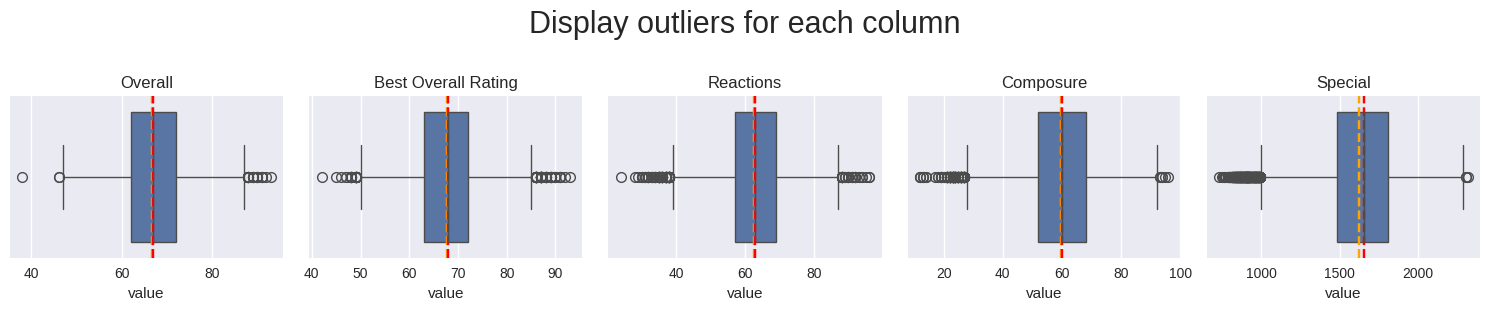 tetapi saya merasa kesulitan untuk mengidentifikasi kolom apa saja yang memiliki jumlah data sebanyak itu sehingga saya akan membuatnya menjadi dataframe untuk mempermudah saya dalam mendapatkan informasi

In [ ]:
data_count = pd.DataFrame({
    'Column name': df_fifa.columns,
    'Count': df_fifa.notnull().sum()
})

data_count = data_count.reset_index(drop=True)

data_count.head()

,Column name,Count
0,ID,17108
1,Name,17108
2,Age,17108
3,Photo,17108
4,Nationality,17108


🚧 Kemudian saya memvisualkannya untuk mengetahui nilai unik dari kolom count

In [ ]:
count = data_count['Count'].value_counts().sort_values(ascending=False)

count

17108    45
17069     7
17083     2
17088     2
17105     2
16783     1
15659     1
922       1
16612     1
16821     1
942       1
15479     1
16166     1
Name: Count, dtype: int64

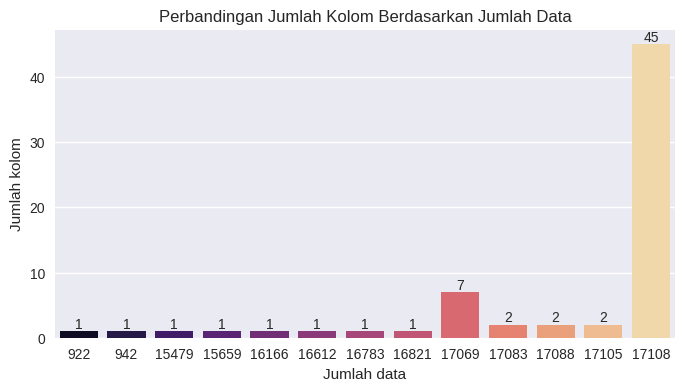

In [ ]:
plt.figure(figsize=(8, 4))

ax = sns.barplot(x=count.index, y=count.values, palette='magma')

for p in ax.containers:
  ax.bar_label(p,)

plt.xlabel('Jumlah data')

plt.ylabel('Jumlah kolom')

plt.title('Perbandingan Jumlah Kolom Berdasarkan Jumlah Data')

plt.show()

🚧 Dari hasil di atas dapat dilihat bahwasanya:
1. Data yang berjumlah 17108 dimiliki oleh 45 kolom.
2. Setidaknya terdapat 21 kolom yang terindikasi null values pada saat ini

Kemudian saya menampilkan kolom apa saja yang memiliki jumlah data berdasarkan visualisasi di atas.

In [ ]:
count.index

Int64Index([17108, 17069, 17083, 17088, 17105, 16783, 15659,   922, 16612,
            16821,   942, 15479, 16166],
           dtype='int64')

In [ ]:
categorized = {}

for idx in count.index:

  category_name = idx

  columns = data_count.loc[data_count['Count'] == idx, 'Column name'].to_list()

  categorized[category_name] = columns

print(categorized)

{17108: ['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall', 'Potential', 'Club Logo', 'Value', 'Wage', 'Special', 'Preferred Foot', 'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate', 'Height', 'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Dribbling', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Reactions', 'ShotPower', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Penalties', 'StandingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', 'Best Position', 'Best Overall Rating', 'OK Player'], 17069: ['Volleys', 'Curve', 'Agility', 'Balance', 'Jumping', 'Vision', 'SlidingTackle'], 17083: ['Body Type', 'Real Face'], 17088: ['Position', 'Jersey Number'], 17105: ['Interceptions', 'Positioning'], 16783: ['Club'], 15659: ['Joined'], 922: ['Loaned From'], 16612: ['Contract Valid Until'], 16821: ['Composure'], 942: ['Marking'], 15479: ['Release Clause'], 16166: ['DefensiveAwarenes

🚧 Berdasarkan proses di atas, hal ini cukup penting karena untuk mengetahui apakah saya perlu melakukan data balancing atau tidak. Akan tetapi, tergantung pada fitur apa saja yang dipakai nantinya

### 🎯 **Step 5: Check summary statistic**
---

🔎 Saya mengecek ringkasan statistik kolom bertipe number dengan `describe()` untuk melihat apakah nilai null values tersebut berasal dari data yang nilai minimalnya 0 pada suatu kolom atau tidak

In [ ]:
df_fifa.describe()

,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,...,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Overall Rating,DefensiveAwareness,OK Player
count,17108.00,17108.00,17108.00,17108.00,17108.00,17108.00,17108.00,17108.00,17088.00,17108.00,...,17108.00,17069.00,17108.00,17108.00,17108.00,17108.00,17108.00,17108.00,16166.00,17108.00
mean,221421.28,25.05,66.78,72.55,1625.72,1.15,2.98,2.45,20.76,51.36,...,48.10,45.93,15.66,15.53,15.47,15.55,15.77,67.75,47.01,0.14
std,36028.79,4.92,7.02,5.74,263.50,0.46,0.67,0.78,17.19,17.95,...,21.53,21.21,16.91,16.21,15.98,16.45,17.21,6.77,20.15,0.34
min,2.00,16.00,38.00,46.00,731.00,1.00,1.00,1.00,1.00,6.00,...,5.00,6.00,1.00,1.00,1.00,1.00,1.00,42.00,3.00,0.00
25%,205451.75,21.00,62.00,69.00,1484.00,1.00,3.00,2.00,9.00,40.00,...,28.00,25.00,8.00,8.00,8.00,8.00,8.00,63.00,29.00,0.00
50%,230441.00,24.00,67.00,72.00,1653.00,1.00,3.00,2.00,18.00,55.00,...,55.00,52.00,11.00,11.00,11.00,11.00,11.00,68.00,52.00,0.00
75%,245402.50,28.00,72.00,76.00,1810.00,1.00,3.00,3.00,27.00,65.00,...,66.00,64.00,14.00,14.00,14.00,14.00,14.00,72.00,64.00,0.00
max,259105.00,53.00,93.00,95.00,2316.00,5.00,5.00,5.00,99.00,94.00,...,93.00,95.00,90.00,92.00,93.00,93.00,90.00,93.00,94.00,1.00


In [ ]:
df_fifa.describe().loc['min']

ID                           2.00
Age                         16.00
Overall                     38.00
Potential                   46.00
Special                    731.00
International Reputation     1.00
Weak Foot                    1.00
Skill Moves                  1.00
Jersey Number                1.00
Crossing                     6.00
Finishing                    3.00
HeadingAccuracy              5.00
ShortPassing                 7.00
Volleys                      4.00
Dribbling                    5.00
Curve                        4.00
FKAccuracy                   5.00
LongPassing                  9.00
BallControl                  5.00
Acceleration                12.00
SprintSpeed                 11.00
Agility                     14.00
Reactions                   24.00
Balance                     17.00
ShotPower                   12.00
Jumping                     22.00
Stamina                     11.00
Strength                    16.00
LongShots                    4.00
Aggression    

🚧 Dari hasil di atas dapat dilihat bahwasanya, kolom `Ok Player` nilai min nya 0 dan hal ini dapat dimaklumi karena bertindak sebagai label. Sedangkan untuk kolom lain, null values tidak berasal dari nilai min 0 tetapi memang terdapat data yang null di tengah-tengah data pada suatu kolom

### 🎯 **Step 6: Check null values**
---

🔎 Dari hasil grafik pada step 4, setidaknya terdapat 21 kolom yang terindikasi memiliki null values.  Selanjutnya, saya menampilkan daftar kolom-kolom yang memiliki nilai null tersebut dalam bentuk dataframe.

In [ ]:
def detect_null_values(data):
    null_column = data.columns[data.isnull().any()]

    head_column = ["Column name", "Total nulls", "Total nulls (%)", "Data type"]

    null_info = pd.DataFrame(columns=head_column)

    for column in null_column:

        total_null = data[column].isnull().sum()

        total_null_percent = (total_null / len(data)) * 100

        data_type = data[column].dtype

        null_info = pd.concat([null_info, pd.DataFrame([[column, total_null, total_null_percent, data_type]], columns=head_column)],  ignore_index=True)

    return null_info

null_info = detect_null_values(df_fifa)

null_info

,Column name,Total nulls,Total nulls (%),Data type
0,Club,325,1.90,object
1,Body Type,25,0.15,object
2,Real Face,25,0.15,object
3,Position,20,0.12,object
4,Jersey Number,20,0.12,float64
5,Joined,1449,8.47,object
6,Loaned From,16186,94.61,object
7,Contract Valid Until,496,2.90,object
8,Volleys,39,0.23,float64
9,Curve,39,0.23,float64


🚧 Dari hasil output di atas, terlihat bahwa memang ada 21 kolom dalam DataFrame yang memiliki nilai null (null values). Mayoritas dari kolom-kolom tersebut memiliki tipe data 'number', sedangkan hanya 8 kolom yang memiliki tipe data object (kategorikal).

Penentuan pengisian null values untuk kolom bertipe  number menggunakan mean, median, ataupun modus akan ditentukan pada step 10.1. Sementara itu, untuk kolom bertipe object, pengisian nilai null akan dilakukan menggunakan modus.

### 🎯 **Step 7: Check duplicate values**
---

In [ ]:
df_fifa.duplicated().sum()

0

🚧 Tidak terdapat kolom yang datanya duplikasi

### 🎯 **Step 8: Separate columns based on dtype**
---

🔎 Saya memisahkan kolom number dan object (berdasarkan dtype) karena preprocessing dan data cleaning-nya sedikit berbeda. Akan tetapi saya tetap ikut menyertakan kolom `OK Player` pada kolom-kolom object untuk melihat korelasinya

In [ ]:
numeric_columns = df_fifa.select_dtypes(include=['number'])

categorical_columns = df_fifa.select_dtypes(include=['object'])
categorical_columns = categorical_columns.assign(**{'OK Player': df_fifa['OK Player']})

In [ ]:
numeric_columns.head()

,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,...,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Overall Rating,DefensiveAwareness,OK Player
0,176580,33,87,87,2316,5.00,4.00,3.00,9.00,80.00,...,45.00,38.00,27.00,25.00,31.00,33.00,37.00,87.00,57.00,1
1,192985,29,91,91,2304,4.00,5.00,4.00,17.00,94.00,...,65.00,53.00,15.00,13.00,5.00,10.00,13.00,91.00,68.00,1
2,212198,25,87,90,2303,2.00,4.00,4.00,18.00,87.00,...,67.00,55.00,12.00,14.00,15.00,8.00,14.00,88.00,72.00,1
3,194765,29,87,87,2288,4.00,3.00,4.00,7.00,83.00,...,54.00,49.00,14.00,8.00,14.00,13.00,14.00,87.00,59.00,1
4,224334,28,83,83,2280,2.00,3.00,4.00,19.00,87.00,...,82.00,79.00,8.00,14.00,13.00,13.00,14.00,83.00,79.00,1


In [ ]:
categorical_columns.head()

,Name,Photo,Nationality,Flag,Club,Club Logo,Value,Wage,Preferred Foot,Work Rate,...,Real Face,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Best Position,Release Clause,OK Player
0,L. Suárez,https://cdn.sofifa.com/players/176/580/20_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,Atlético Madrid,https://cdn.sofifa.com/teams/240/light_30.png,€31.5M,€115K,Right,High/ Medium,...,Yes,"<span class=""pos pos24"">RS","Sep 25, 2020",NaN,2022,6'0,190lbs,ST,€64.6M,1
1,K. De Bruyne,https://cdn.sofifa.com/players/192/985/20_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,Manchester City,https://cdn.sofifa.com/teams/10/light_30.png,€87M,€370K,Right,High/ High,...,Yes,"<span class=""pos pos13"">RCM","Aug 30, 2015",NaN,2023,5'11,154lbs,CAM,€161M,1
2,Bruno Fernandes,https://cdn.sofifa.com/players/212/198/20_60.png,Portugal,https://cdn.sofifa.com/flags/pt.png,Manchester United,https://cdn.sofifa.com/teams/11/light_30.png,€63M,€195K,Right,High/ High,...,Yes,"<span class=""pos pos18"">CAM","Jan 30, 2020",NaN,2025,5'10,152lbs,CAM,€124.4M,1
3,A. Griezmann,https://cdn.sofifa.com/players/194/765/20_60.png,France,https://cdn.sofifa.com/flags/fr.png,FC Barcelona,https://cdn.sofifa.com/teams/241/light_30.png,€50.5M,€290K,Left,Medium/ Medium,...,Yes,"<span class=""pos pos23"">RW","Jul 12, 2019",NaN,2024,5'9,161lbs,ST,€103.5M,1
4,M. Acuña,https://cdn.sofifa.com/players/224/334/20_60.png,Argentina,https://cdn.sofifa.com/flags/ar.png,Sevilla FC,https://cdn.sofifa.com/teams/481/light_30.png,€22M,€41K,Left,High/ High,...,No,"<span class=""pos pos7"">LB","Sep 14, 2020",NaN,2024,5'8,152lbs,LB,€46.2M,1


### 🎯 **Step 9: Step for categorical columns**
---

#### ✨ Step 9.1: DC - Feature selection

🔎 Untuk memilih fitur, saya melakukan secara manual dengan mempertimbangkan outlier, null values, dan hubungan suatu kolom dengan kolom `OK Player`

Saya juga mengambil kolom Wage, Release Clause, dan Value karena nantinya setelah preprocessing akan saya pindahkan kolom-kolom tersebut ke numeric_columns pada step 10

In [ ]:
selected_features_c = categorical_columns[['Wage', 'Best Position', 'Preferred Foot', 'Release Clause', 'Value']]

selected_features_c.head()

,Wage,Best Position,Preferred Foot,Release Clause,Value
0,€115K,ST,Right,€64.6M,€31.5M
1,€370K,CAM,Right,€161M,€87M
2,€195K,CAM,Right,€124.4M,€63M
3,€290K,ST,Left,€103.5M,€50.5M
4,€41K,LB,Left,€46.2M,€22M


#### ✨ Step 9.2: DC - Handling null values

🔎 Dari step 9.1, saya akan melakukan data cleaning dan untuk penyebutan data cleaning akan saya singkat dengan 'DC'

In [ ]:
detect_null_values(selected_features_c)

,Column name,Total nulls,Total nulls (%),Data type
0,Release Clause,1629,9.52,object


🚧 Berdasarkan hasil di atas hanya kolom Release Clause yang memiliki null values dan saya akan melakukan imputasi modus untuk menanganinya

In [ ]:
selected_features_c['Release Clause'] = selected_features_c['Release Clause'].fillna(selected_features_c['Release Clause'].mode()[0])

In [ ]:
detect_null_values(selected_features_c)

,Column name,Total nulls,Total nulls (%),Data type


#### ✨ Step 9.3: DC - convert column Wage, Release Clause, and Value to number

In [ ]:
def detect_column(data, character):

  columns_with_character = data.applymap(lambda x: character in str(x)).any()

  print(f"Columns with {character}: {(columns_with_character[columns_with_character].index).tolist()}")

  return columns_with_character[columns_with_character].index


def remove_character(data, column, character):

  data[column] = data[column].apply(lambda row: row.apply(lambda x: str(x).replace(character, '')))


def interpret_value(value):

    if 'K' in value:

        return int(float(value.replace('K', '')) * 1000)

    elif 'M' in value:

        return int(float(value.replace('M', '')) * 1000000)

    else:

        return int(value)

In [ ]:
column = detect_column(selected_features_c, '€')

column

Columns with €: ['Wage', 'Release Clause', 'Value']


Index(['Wage', 'Release Clause', 'Value'], dtype='object')

In [ ]:
remove_character(selected_features_c, column, '€')

selected_features_c[column.tolist()].head()

,Wage,Release Clause,Value
0,115K,64.6M,31.5M
1,370K,161M,87M
2,195K,124.4M,63M
3,290K,103.5M,50.5M
4,41K,46.2M,22M


In [ ]:
selected_features_c[column[0]] = selected_features_c[column[0]].apply(interpret_value)
selected_features_c[column[1]] = selected_features_c[column[1]].apply(interpret_value)
selected_features_c[column[2]] = selected_features_c[column[2]].apply(interpret_value)

In [ ]:
selected_features_c.head()

,Wage,Best Position,Preferred Foot,Release Clause,Value
0,115000,ST,Right,64599999,31500000
1,370000,CAM,Right,161000000,87000000
2,195000,CAM,Right,124400000,63000000
3,290000,ST,Left,103500000,50500000
4,41000,LB,Left,46200000,22000000


#### ✨ Step 9.4: DC - Encode words into numbers

🔎 Untuk melakukan encode beberapa cara, seperti
- Ordinal encoder <br>
  Digunakan apabila antar data menggambarkan suatu hubungan urutan, pemberian numerik berdasarkan peringkat relatif suatu data tetapi tetap mempertahankan informasi urutan
- Label encoder <br>
  Digunakan apabila antar data menggambarkan suatu hubungan urutan tetapi tidak mempertahankan informasi urutan
- One hot encoder <br>
  Digunakan apabila antar data tidak terdapat hubungan urutan

##### 📫 Best Position Column

In [ ]:
selected_features_c['Best Position'].value_counts().index

Index(['CB', 'ST', 'CAM', 'GK', 'RM', 'CDM', 'CM', 'RB', 'LB', 'LM', 'RW',
       'RWB', 'LWB', 'LW', 'CF'],
      dtype='object')

🚧 Setelah saya meneliti lebih lanjut tentang posisi pemain, terlihat bahwa data pada kolom "Best Position" mencerminkan suatu urutan tertentu. Oleh karena itu, untuk mengkodekan data ini, saya memilih menggunakan metode ordinal encoding bukan .

In [ ]:
ordinal_encoder = OrdinalEncoder()

selected_features_c['Best Position'] = ordinal_encoder.fit_transform(selected_features_c[['Best Position']])

selected_features_c.head()

,Wage,Best Position,Preferred Foot,Release Clause,Value
0,115000,14.00,Right,64599999,31500000
1,370000,0.00,Right,161000000,87000000
2,195000,0.00,Right,124400000,63000000
3,290000,14.00,Left,103500000,50500000
4,41000,6.00,Left,46200000,22000000


##### 📫 Preferred Foot Column

In [ ]:
selected_features_c['Preferred Foot'].value_counts().index

Index(['Right', 'Left'], dtype='object')

🚧 Berdasarkan hasil di atas sepertinya tidak terdapat hubungan urutan antar datanya sehingga saya langsung saja mengganti nilainya menggunakan mapping

In [ ]:
position_mapping = {'Right': 1, 'Left': 0}

selected_features_c['Preferred Foot'] = selected_features_c['Preferred Foot'].map(position_mapping)

selected_features_c.head()

,Wage,Best Position,Preferred Foot,Release Clause,Value
0,115000,14.00,1,64599999,31500000
1,370000,0.00,1,161000000,87000000
2,195000,0.00,1,124400000,63000000
3,290000,14.00,0,103500000,50500000
4,41000,6.00,0,46200000,22000000


### 🎯 **Step 10: Step for numeric columns**
---

🔎 Pada tahap ini saya akan memindahkan kolom Wage, Release Clause, dan Value ke numeric columns serta saya akan menghapus 3 kolom tersebut pada `selected_features_c`

In [ ]:
numeric_columns = numeric_columns.assign(**{
    'Wage': selected_features_c['Wage'],
    'Release Clause': selected_features_c['Release Clause'],
    'Value': selected_features_c['Value']
})

selected_features_c.drop(['Wage', 'Release Clause', 'Value'], axis=1, inplace=True)

numeric_columns.head()

,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,...,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Overall Rating,DefensiveAwareness,OK Player,Wage,Release Clause,Value
0,176580,33,87,87,2316,5.00,4.00,3.00,9.00,80.00,...,25.00,31.00,33.00,37.00,87.00,57.00,1,115000,64599999,31500000
1,192985,29,91,91,2304,4.00,5.00,4.00,17.00,94.00,...,13.00,5.00,10.00,13.00,91.00,68.00,1,370000,161000000,87000000
2,212198,25,87,90,2303,2.00,4.00,4.00,18.00,87.00,...,14.00,15.00,8.00,14.00,88.00,72.00,1,195000,124400000,63000000
3,194765,29,87,87,2288,4.00,3.00,4.00,7.00,83.00,...,8.00,14.00,13.00,14.00,87.00,59.00,1,290000,103500000,50500000
4,224334,28,83,83,2280,2.00,3.00,4.00,19.00,87.00,...,14.00,13.00,13.00,14.00,83.00,79.00,1,41000,46200000,22000000


#### ✨ Step 10.1: Checks and displays correlation

🔎 Sebelum melakukan langkah pra-pemrosesan data, saya akan memilih beberapa kolom yang memiliki hubungan erat dengan kolom `OK Player` menggunakan korelasi Pearson. Kolom-kolom ini akan menjadi fitur-fitur yang akan digunakan dalam pembuatan model.

In [ ]:
numeric_columns_corr = numeric_columns.corr()['OK Player'].sort_values(ascending=False)

numeric_columns_corr

OK Player                   1.00
Value                       0.65
Overall                     0.63
Best Overall Rating         0.63
Release Clause              0.62
Wage                        0.58
Reactions                   0.57
International Reputation    0.51
Potential                   0.51
Composure                   0.44
Special                     0.37
Vision                      0.35
ShotPower                   0.33
ShortPassing                0.30
LongPassing                 0.30
Age                         0.26
BallControl                 0.26
Curve                       0.25
Volleys                     0.24
LongShots                   0.23
FKAccuracy                  0.23
Crossing                    0.22
Skill Moves                 0.22
Aggression                  0.22
Dribbling                   0.21
Positioning                 0.21
Penalties                   0.20
Finishing                   0.19
Interceptions               0.18
DefensiveAwareness          0.17
HeadingAcc

🚧 Berdasarkan hasil analisis, saya akan memilih kolom-kolom yang memiliki nilai korelasi lebih besar dari 0.6. Keputusan ini diambil dengan pertimbangan bahwa menggunakan fitur-fitur dengan korelasi yang tinggi dapat membantu model untuk lebih baik merepresentasikan hubungan antara variabel-variabel, menghindari keterbatasan dalam kemampuan prediksi, dan menjaga performa model agar tetap optimal.

Berdasarkan hasil tersebut juga, dapat dilihat kolom-kolom yang memiliki nilai null (step 6) hanya kolom Release Clause yang memiliki korelasi tinggi dengan kolom `OK Player`

#### ✨ Step 10.2: Feature selection

🔎 Pada tahap ini saya akan mengambil kolom-kolom berdasarkan nilai korelasi pada step 10.1

In [ ]:
selected_features = numeric_columns_corr[abs(numeric_columns_corr) > 0.6]

selected_features

OK Player             1.00
Value                 0.65
Overall               0.63
Best Overall Rating   0.63
Release Clause        0.62
Name: OK Player, dtype: float64

In [ ]:
selected_features_columns_name = selected_features.index

selected_features_columns_name

Index(['OK Player', 'Value', 'Overall', 'Best Overall Rating',
       'Release Clause'],
      dtype='object')

In [ ]:
selected_features_n = numeric_columns.loc[ : , selected_features_columns_name].copy()

selected_features_n.head()

,OK Player,Value,Overall,Best Overall Rating,Release Clause
0,1,31500000,87,87.00,64599999
1,1,87000000,91,91.00,161000000
2,1,63000000,87,88.00,124400000
3,1,50500000,87,87.00,103500000
4,1,22000000,83,83.00,46200000


🚧 Akan tetapi pada step selanjutnya ini saya akan drop kolom Overall sesuai perintah PROJECT2 ini. Saya tidak akan melakukan preprocessing apapun pada kolom `OK Player` karena bertindak sebagai label

In [ ]:
selected_features_n.drop(['Overall', 'Best Overall Rating'], axis=1, inplace=True)

#### ✨ Step 10.3: Checks and displays skewness

🔎 Dengan menggunakan skewness, saya mendapatkan gambaran sejauh mana distribusi data dari suatu kolom.
- Distribusi normal <br>
  - Nilai skewness = 0
  - Distribusi data simetris atau hampir simetris
- Distribusi tidak normal <br>
  - Nilai skewness ≠ 0 (positif atau negatif)
  - Distribusi data asimetris

Jika distribusi normal maka menggunakan mean sedangkan jika distribusi tidak normal maka bisa menggunakan median atau modus untuk imputasi null values atau outlier

Saat menentukan apakah suatu kolom memiliki distribusi normal atau tidak, langkah pertama saya biasanya memeriksa nilai skewness. Meskipun skewness memberikan indikasi awal, terkadang nilai tersebut belum cukup untuk memberikan gambaran yang jelas tentang distribusi data. Oleh karena itu, langkah kedua saya adalah melihat visualisasi distribusi data, karena grafik dapat memberikan pemahaman yang lebih nyata tentang bentuk distribusi dan karakteristiknya

In [ ]:
skewness_numeric_columns = selected_features_n.skew()

skewness_numeric_columns = pd.DataFrame(
    {
        'Column name': skewness_numeric_columns.index,
        'Skewness value': skewness_numeric_columns.values
    }
)

skewness_numeric_columns['Skewness type'] = skewness_numeric_columns['Skewness value'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Symmetric'))

skewness_numeric_columns

,Column name,Skewness value,Skewness type
0,OK Player,2.11,Positive
1,Value,6.26,Positive
2,Release Clause,6.41,Positive


In [ ]:
def plot_numeric_columns(dataframe, plot_type='histplot', title=''):

    graph = sns.FacetGrid(dataframe.melt(), col="variable", col_wrap=5, sharex=False, sharey=False)


    if plot_type == 'histplot':

        graph.map(sns.histplot, "value", kde=True)

    elif plot_type == 'boxplot':

        graph.map(sns.boxplot, "value")


    for i, ax in enumerate(graph.axes.flat):

        ax.set_title(dataframe.columns[i])

    for i, ax in enumerate(graph.axes.flat):

        data = dataframe.iloc[:, i].dropna()

        mean = data.mean()

        ax.axvline(mean, color='orange', linestyle='--', label=f"Mean: {mean:.2f}")

        median = data.median()

        ax.axvline(median, color='red', linestyle='--', label=f"Median: {median:.2f}")

    graph.fig.suptitle(title, y=1.02, fontsize=22)

    plt.tight_layout()

    plt.show()

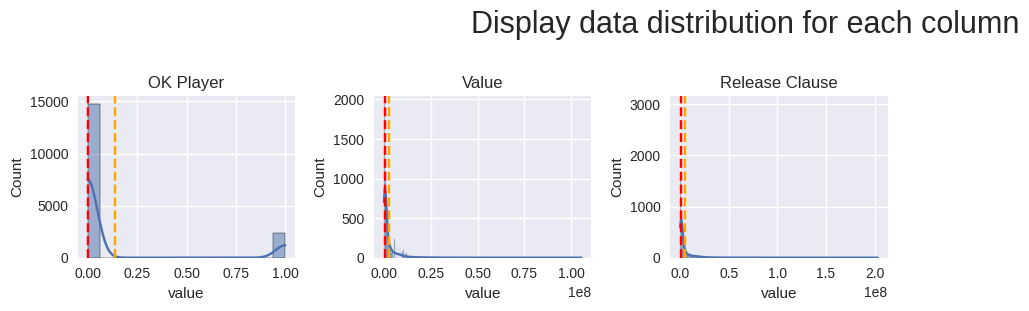

In [ ]:
plot_numeric_columns(selected_features_n, plot_type='histplot', title='Display data distribution for each column')

🚧 Dari hasil di atas dapat diketahui mayoritas distribusinya tidak normal dan hanya kolom Best Overall Rating yang distribusinya normal.

Dalam langkah ini, sebenarnya sudah cukup untuk menentukan cara imputasi outlier atau null values. Jika distribusinya normal, kita dapat menggunakan nilai mean. Namun, perlu diingat bahwa penggunaan mean rentan terhadap outlier sehingga perlu pengecekan outlier. Meskipun demikian, saya masih akan melakukan pengecekan terhadap outlier karena adanya outlier dapat mempengaruhi akurasi model.

#### ✨ Step 10.4: Checks and displays outliers

In [ ]:
def detect_outliers_iqr(column):

    Q1 = column.quantile(0.25)

    Q3 = column.quantile(0.75)

    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR

    upper_bound = Q3 + 1.5 * IQR

    outliers = selected_features_n[(column < lower_bound) | (column > upper_bound)]

    return outliers, lower_bound, upper_bound

In [ ]:
def iteration_each_column(data):

    outliers_info = []

    for column in data:

        outliers, lower_bound, upper_bound = detect_outliers_iqr(data[column])

        outliers_info.append([column, outliers[column].sum(), lower_bound, upper_bound])

    outliers_info = pd.DataFrame(outliers_info, columns=['Column name', 'Total outliers', 'Lower bound', 'Upper bound'])

    return outliers_info

In [ ]:
outliers_info = iteration_each_column(selected_features_n)

outliers_info

,Column name,Total outliers,Lower bound,Upper bound
0,OK Player,2352,0.00,0.00
1,Value,28074500000,-2662500.00,5437500.00
2,Release Clause,53739499980,-3942500.00,8605500.00


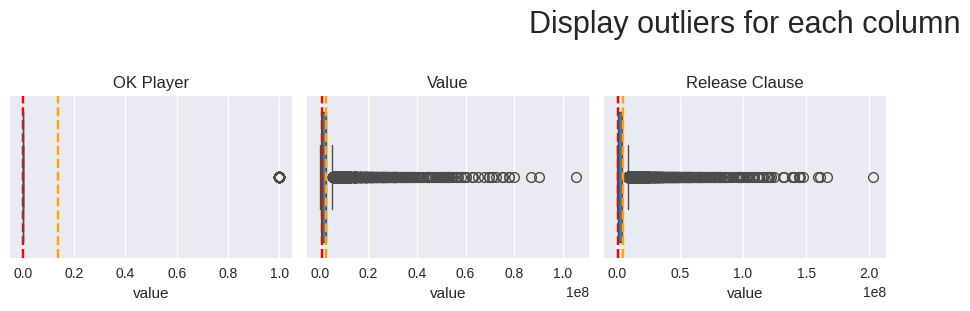

In [ ]:
plot_numeric_columns(selected_features_n, plot_type='boxplot', title='Display outliers for each column')

🚧 Berdasarkan output yang diperoleh, kita bisa menyimpulkan bahwa semua kolom memiliki nilai outlier. Namun, perlu dilakukan pengolahan khusus pada kolom-kolom yang mengandung outlier untuk mengurangi jumlahnya karena outlier dapat mempengaruhi performa model kecuali kolom `OK Player`.

#### ✨ Step 10.5: DC - Handling null values

🔎 Dari step 10.5, saya akan melakukan data cleaning dan untuk penyebutan data cleaning akan saya singkat dengan 'DC'

In [ ]:
detect_null_values(selected_features_n)

,Column name,Total nulls,Total nulls (%),Data type


🚧 Ternyata tidak ada kolom yang memiliki null values

#### ✨ Step 10.6: DC - Handling outliers

🔎 Untuk handling outliers, saya tidak akan menghapus outliers yang ada karena itu akan berdampak pada kehilang informasi.

Terdapat beberapa langkah untuk mengatasi outlier:
- Menghapus data outlier
- Imputasi median atau
 modus
- Menggunakan winsorization atau capping <br>
  mengatasi efek ekstrem (outliers) dengan menggantikan nilai-nilai ekstrem tersebut dengan nilai batas (cutoff)
- Menggunakan teknik robust estimation (M-estimation)

Saya telah menganilisis sekilas data outlier yang ada, saya melihat data outlier tersebut bukan kesalahan pengukuran melainkan memang variasi alami data sehingga bisa dibiarkan atau menggunakan winsorization untuk mengurangi outlier. Saya telah menggunakan metode tersebut hasilnya tidak jauh berbeda sebelum proses tersebut.
Sehingga untuk mengatasi outlier tersebut saya akan menggunakan median.

**Saya tidak akan melakukan preprocess outlier pada kolom `OK Player`**



In [ ]:
for column in outliers_info['Column name']:

  if column != 'OK Player':

    if outliers_info.loc[outliers_info['Column name'] == column, 'Total outliers'].values[0]:

      lower_bound = outliers_info.loc[outliers_info['Column name'] == column, 'Lower bound'].values[0]
      upper_bound = outliers_info.loc[outliers_info['Column name'] == column, 'Upper bound'].values[0]

      print(lower_bound, upper_bound)

      # Retrieving median value from column 'column'
      median = selected_features_n[column].median()

      selected_features_n.loc[(selected_features_n[column] < lower_bound) | (selected_features_n[column] > upper_bound), column] = median


In [ ]:
outliers_info = iteration_each_column(selected_features_n)

outliers_info

In [ ]:
plot_numeric_columns(selected_features_n, plot_type='histplot', title='Display data distribution for each column')

In [ ]:
plot_numeric_columns(selected_features_n, plot_type='boxplot', title='Display outliers for each column')

🚧 Berdasarkan output di atas, mayoritas nilai outlier pada suatu kolom berkurang dan masih terdapat. Untuk saat ini, saya akan membiarkannya karena saya ingin melihat apakah dampak adanya outlier tersebut besar atau tidak pada hasil model.

## Build and Train your model

In this task you will analyze the data and select the features that is best at predicting if the Player is a 'Valuable' player or not.

The first step is to **define the target output** that you will use for training. Here's an example of how to create a target output:
- `df['OK Player'] = df['Overall'].apply(lambda x: 1 if x >= 50 else 0) #Define the OK Player using treshold of 50.`

Next you will **identify the features** that will best predict a 'Valuable' player. You are required to **submit the features you selected** in the Submission section below. Because we use the "Overall" as our target output, the use of "Overall" in your features is not allowed. You will automatically get 0 if you submit "Overall" in your features.

Once you identify the features, you will then **split the data** into Training set and Testing/Validation set.

Depending on the features you selected, **you may need to scale the features**.

Now you will **train your model, choose the algorithm** you are going to use carefully to make sure it gives the best result.

Once you have trained your model, you need to test the model effectiveness. **Make predictions against your Testing/Validation set** and evaluate your model. You are required to **submit the Accuracy Score and F1 score** in the Submission section below.

In the code block below, you can use the comments to guide you on what to do.

We have also provided 3 variables that you must use in your code, `ml_features`, `ml_accuracy` and `ml_f1_score`. You can move the variables around your code, assign values to them, but you cannot delete them.

### 🎯 **Step 11: Combines numeric and categorical columns**
---

In [ ]:
df_fifa_new = pd.concat([selected_features_n, selected_features_c], axis=1)

df_fifa_new.head()

,OK Player,Value,Release Clause,Best Position,Preferred Foot
0,1,31500000,64599999,14.00,1
1,1,87000000,161000000,0.00,1
2,1,63000000,124400000,0.00,1
3,1,50500000,103500000,14.00,0
4,1,22000000,46200000,6.00,0


### 🎯 **Step 12: Compare the distribution of the "OK Player" column.**
---

In [ ]:
counts = df_fifa_new['OK Player'].value_counts(ascending=True)

counts

1     2352
0    14756
Name: OK Player, dtype: int64

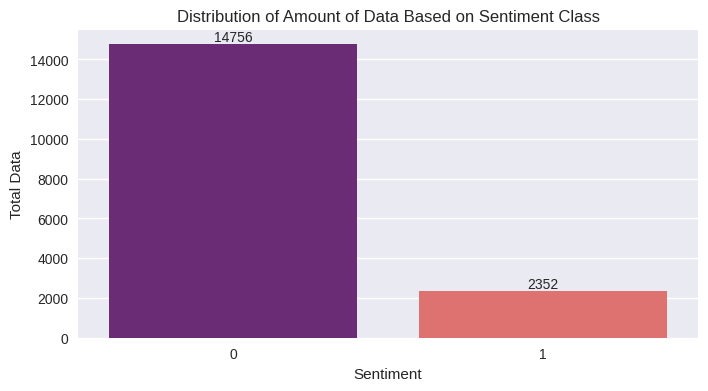

In [ ]:
plt.figure(figsize=(8, 4))

ax = sns.barplot(x=counts.index, y=counts.values, palette='magma')

for p in ax.containers:
  ax.bar_label(p,)

plt.xlabel('Sentiment')

plt.ylabel('Total Data')

plt.title('Distribution of Amount of Data Based on Sentiment Class')

plt.show()

🚧 Berdasarkan grafik di atas dapat diketahui bahwa sebaran data dari label tidak seimbang sehingga harus dilakukan data balancing.

### 🎯 **Step 13: Split data into features and labels**
---

In [ ]:
X = df_fifa_new.drop('OK Player', axis=1)

y = df_fifa_new['OK Player']

In [ ]:
X.head()

,Value,Release Clause,Best Position,Preferred Foot
0,31500000,64599999,14.00,1
1,87000000,161000000,0.00,1
2,63000000,124400000,0.00,1
3,50500000,103500000,14.00,0
4,22000000,46200000,6.00,0


In [ ]:
len(X), len(y)

(17108, 17108)

### 🎯 **Step 14: Balance the amount of label class data**
---

🔎 Dalam menyeimbangkan data saya akan menggunakan Random undersampling dan Oversampling dari SMOTE karena saya ingin melakukan percobaan manakah yang terbaik

In [ ]:
from collections import Counter

counter = Counter(y)
print('Before', counter)

rus = RandomUnderSampler(random_state=42, replacement=True)
# rus = SMOTE(random_state=42)

x_rus, y_rus = rus.fit_resample(X, y)

counter = Counter(y_rus)
print('After', counter)

Before Counter({0: 14756, 1: 2352})
After Counter({0: 2352, 1: 2352})


In [ ]:
len(x_rus), len(y_rus)

(4704, 4704)

### 🎯 **Step 15: Split data into train and test**
---

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_rus, y_rus, test_size=0.2, random_state=42)

In [ ]:
len(X_train), len(X_test), Counter(y_train), Counter(y_test)

(3763, 941, Counter({1: 1880, 0: 1883}), Counter({1: 472, 0: 469}))

### 🎯 **Step 16: Equalize the data range**
---

🔎 Dalam step 10.2, terlihat bahwa rentang nilai antar kolom sangat bervariasi, dan untuk menangani ini, perlu dilakukan penyesuaian. Selanjutnya, pada langkah 10.4, diketahui bahwa setiap kolom memiliki outlier. Oleh karena itu, sebagai solusi, saya memutuskan untuk menggunakan Robust Scaler karena scaler ini lebih tahan terhadap pengaruh outlier, sehingga dapat membantu menjaga konsistensi dan keandalan dalam proses penskalaan data.

In [ ]:
scaler = RobustScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [ ]:
len(X_train_scaled), len(X_test_scaled)

(3763, 941)

### 🎯 **Step 17: Create model with hyperparameter tuning**
---

In [ ]:
# from lazypredict.Supervised import LazyClassifier

# clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric = None)

# models, predictions = clf.fit(X_train_scaled, X_test_scaled, y_train, y_test)

In [ ]:
# print(models)

🔎 Saya mencoba menggunakan `lazypredict` untuk menemukan algoritma yang cocok dengan data yang telah saya preprocessing sedemikian rupa. Didapatkan beberapa algoritma seperti di bawah ini tetapi saya melihat bagian yang unik yaitu beberapa algoritma memiliki nilai akurasi yang sama.

Hasil model tuning dengan undersampling tanpa pemrosesan outlier

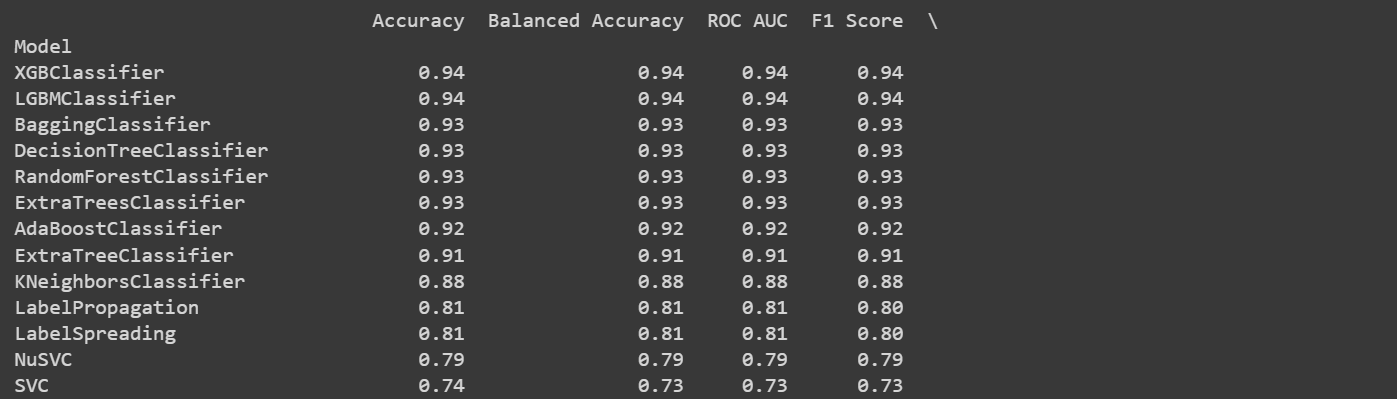

Hasil model tuning dengan oversampling tanpa pemrosesan outlier

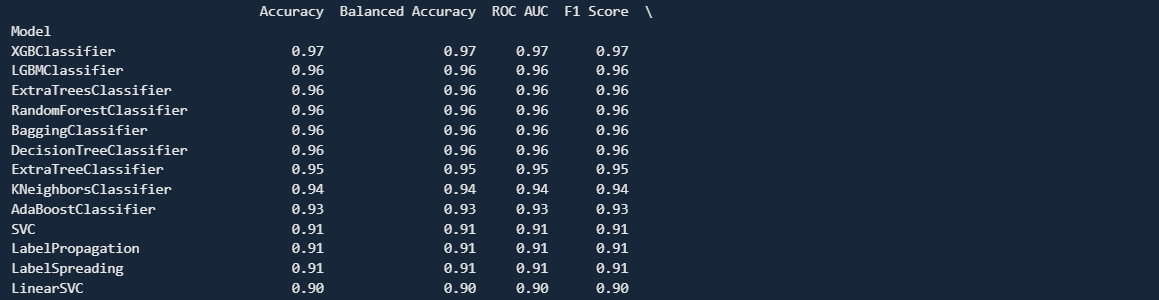

🚧 Dari hasil lazypredict di atas, saya tidak semerta-merta mengambil algoritma yang teratas. Akan tetapi saya melakukan research terlebih dahulu pada algoritma yang telah saya pelajari di Bootcamp AI ini (yang masuk pada gambar di atas). Setelah saya research, saya memutuskan untuk menggunakan Random Forest karena saya memahami bahwa data saya terdapat outlier sehingga bisa menyebabkan overfitting, Random Forest tahan terhadap adanya outlier.


#### ✨ Create model

In [ ]:
model = RandomForestClassifier()

params = {
  'n_estimators': [100, 200, 300, 400],
  'max_depth': [None, 5, 10, 20, 30],
  'min_samples_split': [2, 5, 10, 15],
  'min_samples_leaf': [1, 2, 4, 6]
}

#### ✨ Hyperparameter tuning

🔎 Untuk melakukan hyperparameter tuning saya menggunakan GridSearchCV

In [ ]:
grid_search = GridSearchCV(model, params, cv=5, scoring='accuracy')

grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_

best_model = grid_search.best_estimator_

In [ ]:
joblib.dump(best_model, '/content/drive/MyDrive/SKILL ACADEMY/PROJECT 2/best_model3.h5')

['/content/drive/MyDrive/SKILL ACADEMY/PROJECT 2/best_model3.h5']

#### ✨ Test and evaluate the model

🔎 Matrik evaluasi yang saya gunakan untuk PROJECT 2 ini (klasifikasi) pastinya akurasi, presisi, recall, f1 score, dan confusion matrik

In [ ]:
y_pred = best_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)

precision = precision_score(y_test, y_pred)

recall = recall_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred)

confusion = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.93      0.94      0.94       469
           1       0.94      0.93      0.94       472

    accuracy                           0.94       941
   macro avg       0.94      0.94      0.94       941
weighted avg       0.94      0.94      0.94       941



##### 📫 Accuracy, precision, recall, f1 score

In [ ]:
results = pd.DataFrame({
  'Metrics': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
  'Score': [accuracy, precision, recall, f1]
})

print("Best Parameters: ", best_params)

print("Confusion Matrix: \n", confusion)

print("\nEvaluation Metrics:")

display(results)

Best Parameters:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 15, 'n_estimators': 100}
Confusion Matrix: 
 [[442  27]
 [ 33 439]]

Evaluation Metrics:


,Metrics,Score
0,Accuracy,0.94
1,Precision,0.94
2,Recall,0.93
3,F1 Score,0.94


##### 📫 Confusion matrix

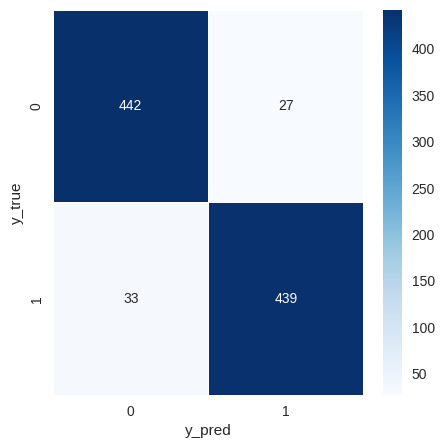

In [ ]:
f, ax=plt.subplots(figsize=(5,5))

sns.heatmap(confusion, annot=True, linewidths=0.5, cmap='Blues', fmt=".0f", ax=ax)

plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

##### 📫 Learning curve

*   https://www.geeksforgeeks.org/using-learning-curves-ml/
*   https://machinelearningmastery.com/learning-curves-for-diagnosing-machine-learning-model-performance/



In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    estimator=grid_search.best_estimator_,  # Menggunakan model terbaik dari hasil grid search
    X=X_train_scaled,
    y=y_train,
    cv=5,
    scoring="accuracy",
    train_sizes=[1, 75, 150, 270, 331]
)

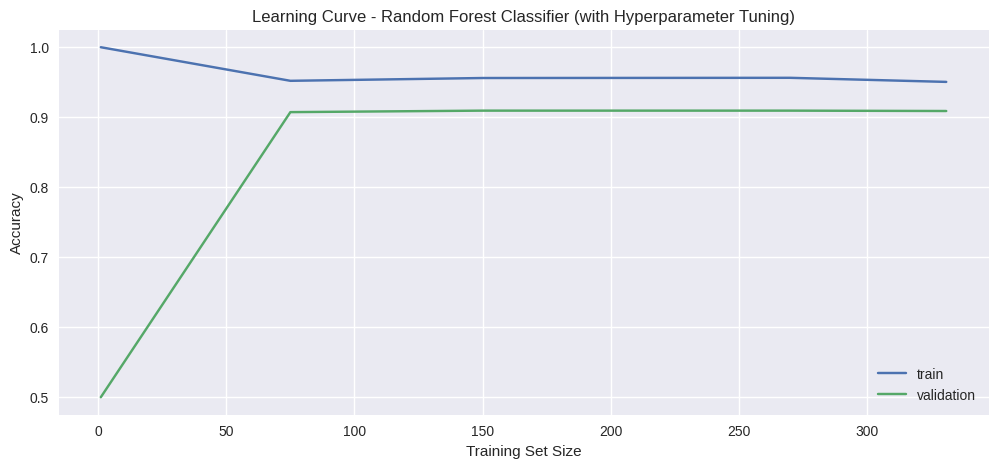

In [ ]:
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

plt.subplots(figsize=(12, 5))
plt.plot(train_sizes, train_mean, label="train")
plt.plot(train_sizes, test_mean, label="validation")

plt.title("Learning Curve - Random Forest Classifier (with Hyperparameter Tuning)")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")

plt.show()

### 🎯 **Step 18: Experiment Documentation**
---

🔎 Saya melakukan eksperimen menggunakan teknik undersampling dan oversampling, serta membandingkan hasilnya dengan dan tanpa pemrosesan outlier. Hasil eksperimen dengan hyper parameter tuning direpresentasikan dalam gambar berikut.


#### ✨ Undersampling dan tanpa preprocessing outlier

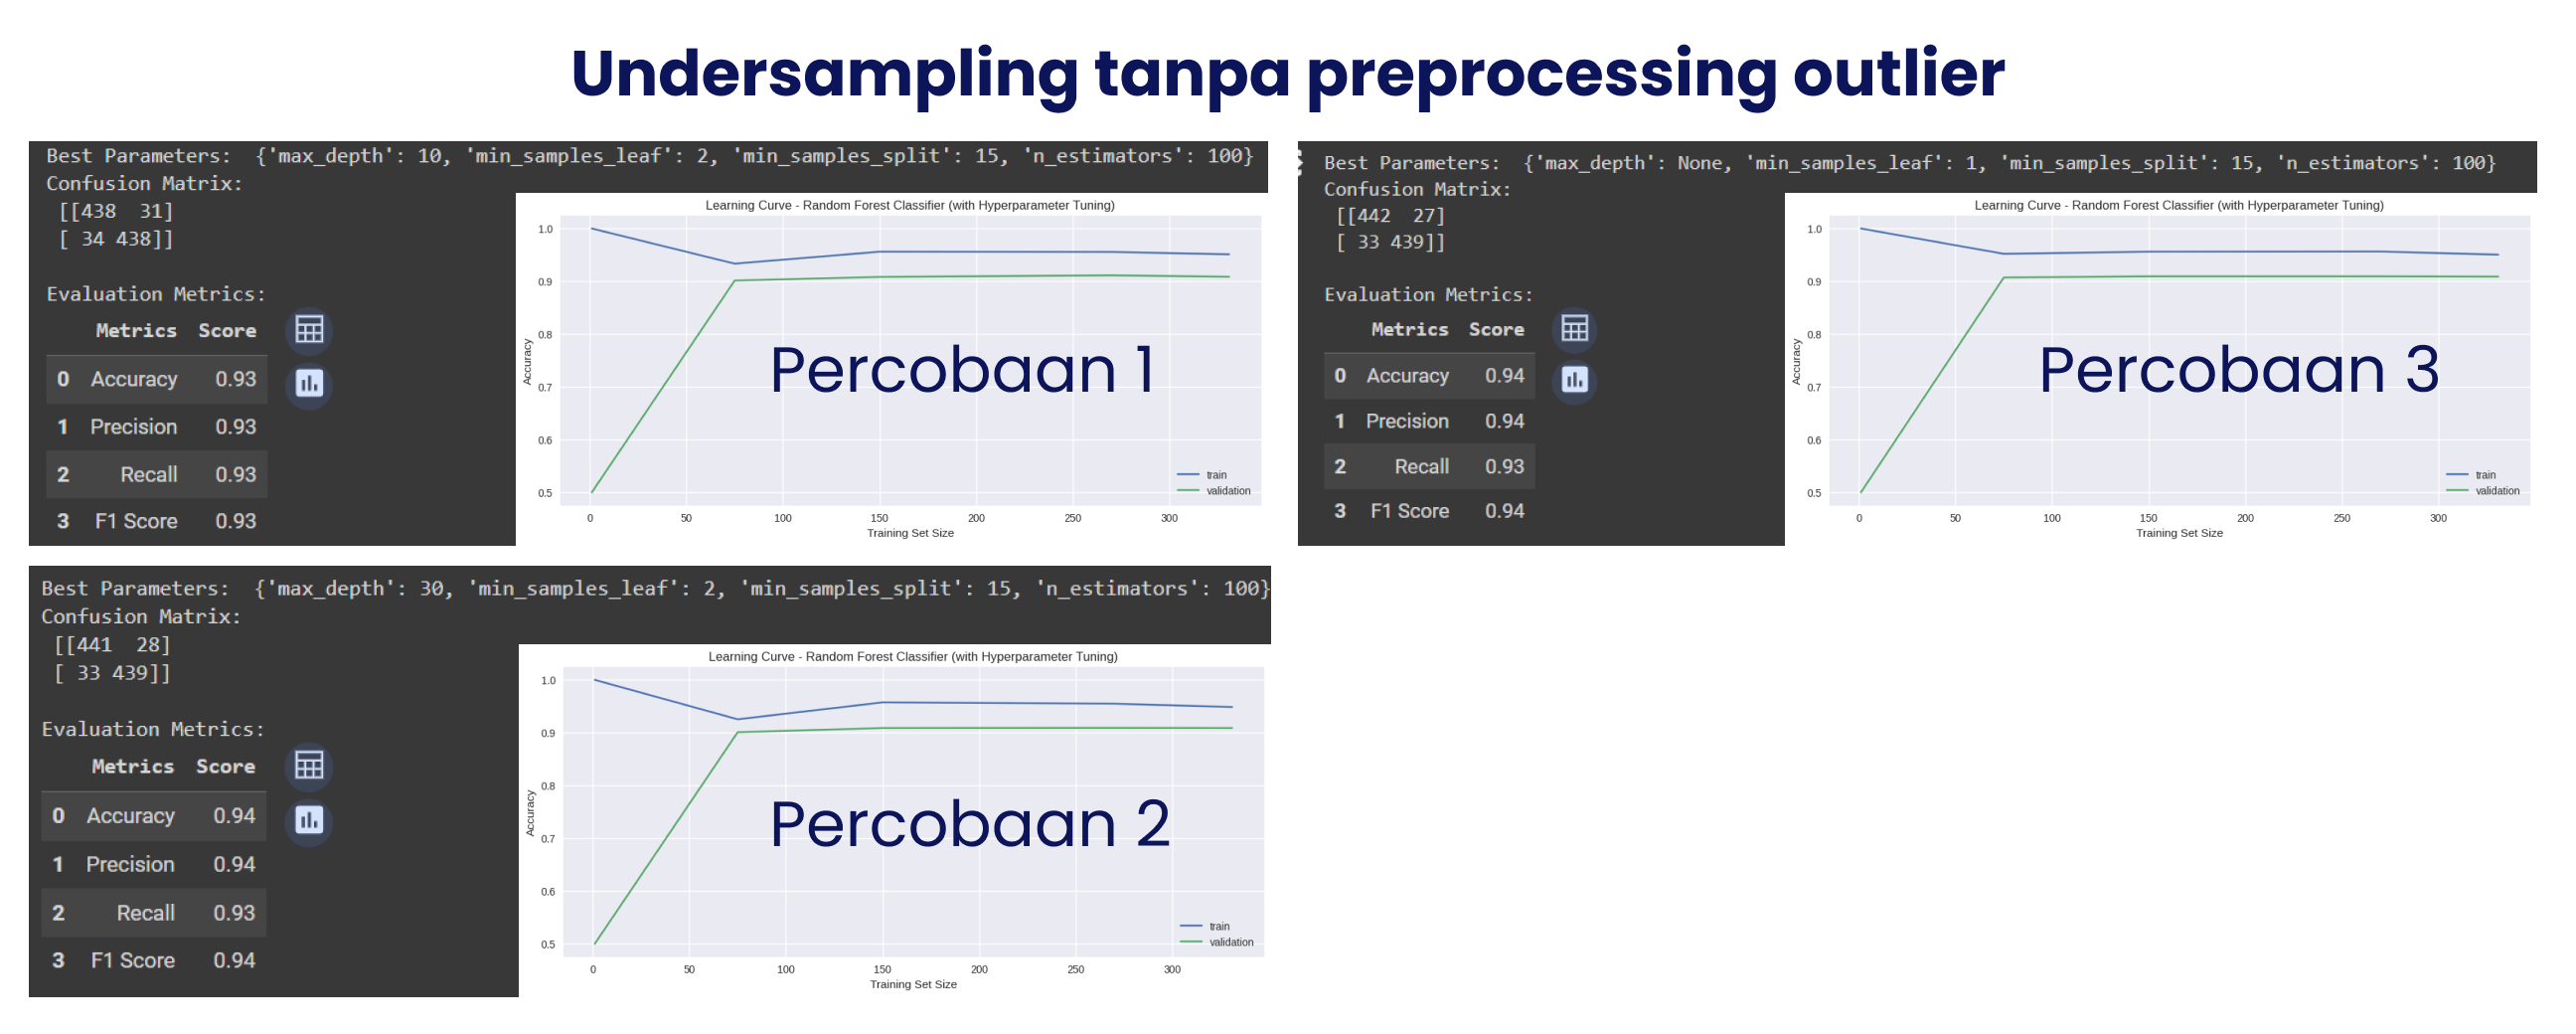

#### ✨ Undersampling dan dengan preprocessing outlier

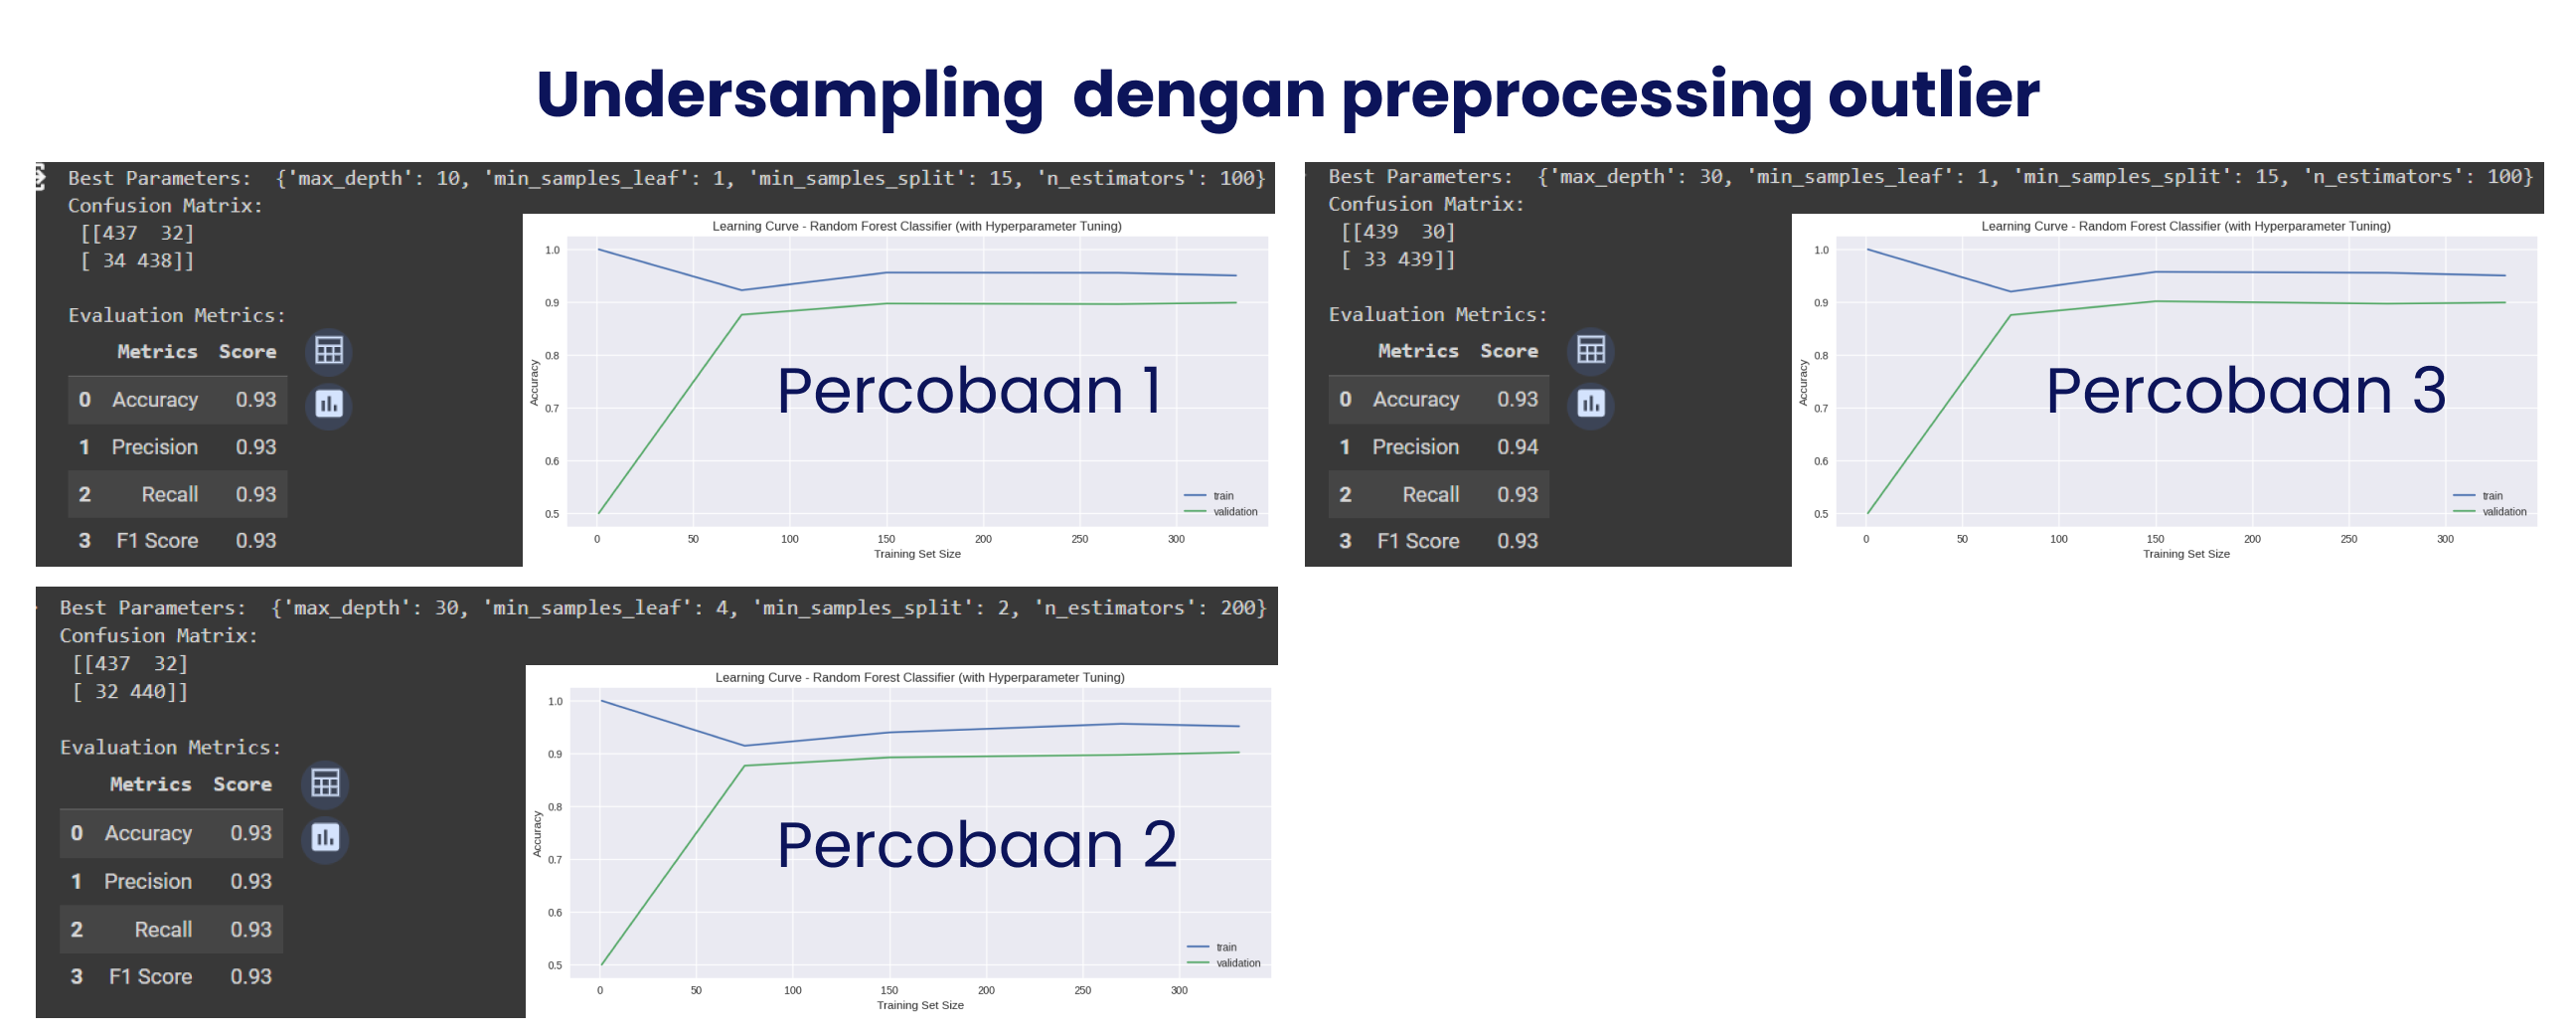

#### ✨ Oversampling dan tanpa preprocessing outlier

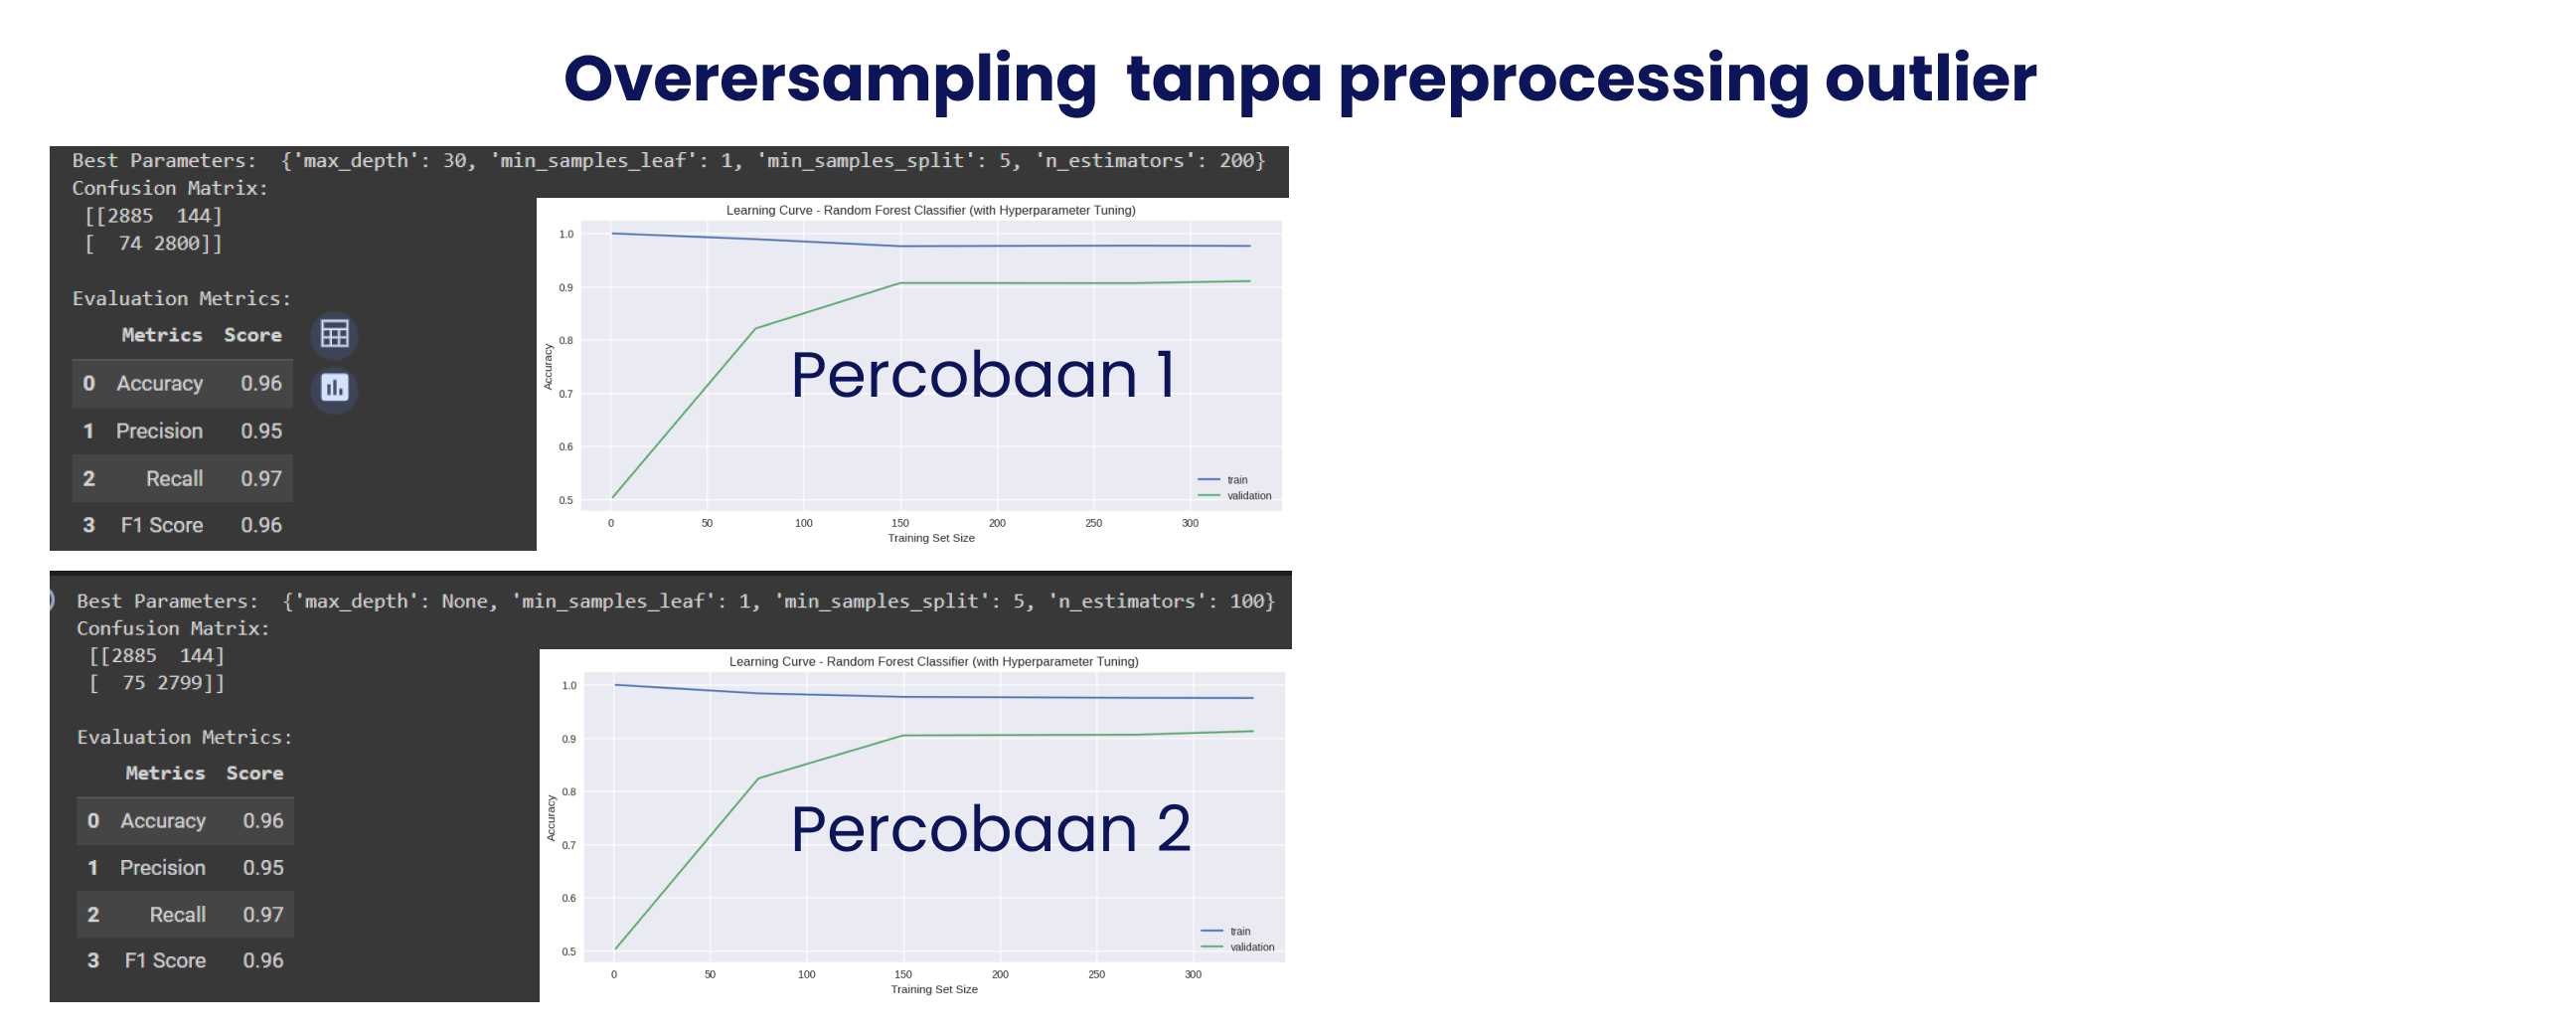

#### ✨ Oversampling dan dengan preprocessing outlier

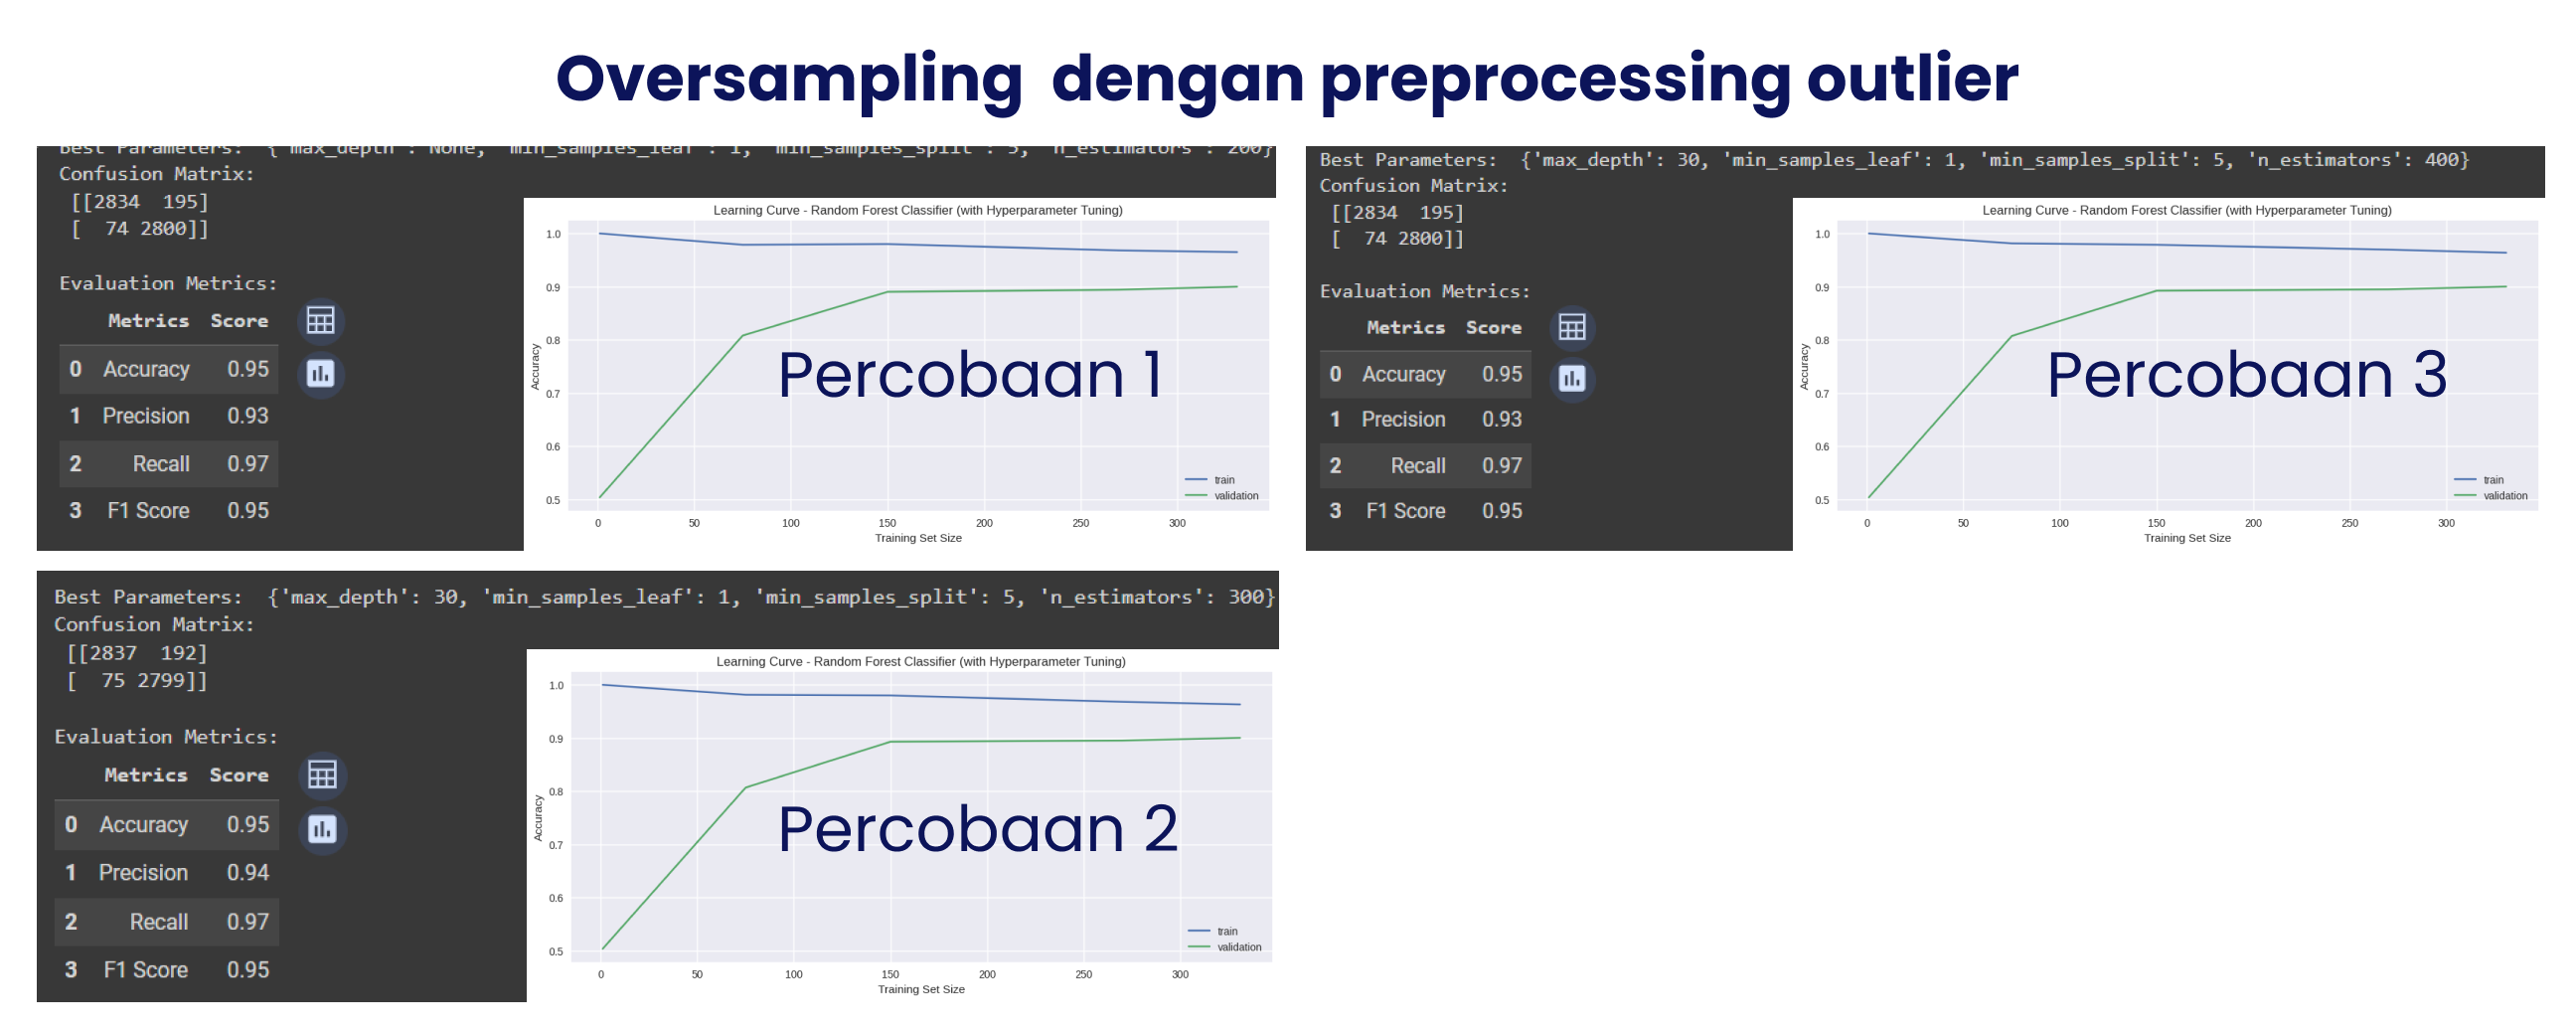

🚧 Berdasarkan gambar eksperimen di atas dapat ditarik kesimpulan sebagai berikut.
1. Ketika menggunakan oversampling maka terdapat kenaikan akurasi, presisi, recall, dan f1 score
2. Ketika melakukan preprocess terhadap data outlier terdapat penurunan akurasi, presisi, recall, dan f1 score. Penurunan ini mungkin karena disebabkan data yang termasuk outlier ialah data alami bukan dari kesalahan pengukuran sehingga ketika mengganti nilai outlier tersebut pasti akan berdampak pada performa model.
3. Ketika melakukan preprocess terhadap data outlier pada oversampling diketahui bahwasanya rentang nilai akurasi, presisi, recall, dan f1 score berbeda-beda tidak seperti menggunakan undersampling yang rentang nilainya hampir sama
4. Ketika melakukan preprocess outlier maupun tidak, grafik learning curve-nya tidak berbeda jauh selisih jarak train dan validation

Dari analisa kesimpulan percobaan saya di atas, saya akan menggunakan model percobaan 3 dari Undersampling dan tanpa preprocessing outlier karena saya melihat rentang nilai akurasi, presisi, recall, dan f1 score sama. Kemudian grafiknya stabil juga

### 🎯 **Step 19: Create model**
---

In [ ]:
from sklearn.model_selection import cross_val_score

rf = joblib.load('/content/drive/MyDrive/SKILL ACADEMY/PROJECT 2/best_model3.h5')


cv_scores = cross_val_score(rf, X_train_scaled, y_train, cv=5, scoring='accuracy')

print("Cross-Validation Scores on Training Data:", cv_scores)
print("Mean Accuracy on Training Data:", cv_scores.mean())

rf.fit(X_train_scaled, y_train)

y_pred = rf.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)

precision = precision_score(y_test, y_pred)

recall = recall_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred)

results = pd.DataFrame({
  'Metrics': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
  'Score': [accuracy, precision, recall, f1]
})

display(results)

confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n", confusion)

print(classification_report(y_test, y_pred))

Cross-Validation Scores on Training Data: [0.94422311 0.90305445 0.8937583  0.90691489 0.92420213]
Mean Accuracy on Training Data: 0.9144305755700601


,Metrics,Score
0,Accuracy,0.93
1,Precision,0.94
2,Recall,0.93
3,F1 Score,0.93


Confusion Matrix: 
 [[440  29]
 [ 35 437]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       469
           1       0.94      0.93      0.93       472

    accuracy                           0.93       941
   macro avg       0.93      0.93      0.93       941
weighted avg       0.93      0.93      0.93       941



Berikut hasil dari step 19

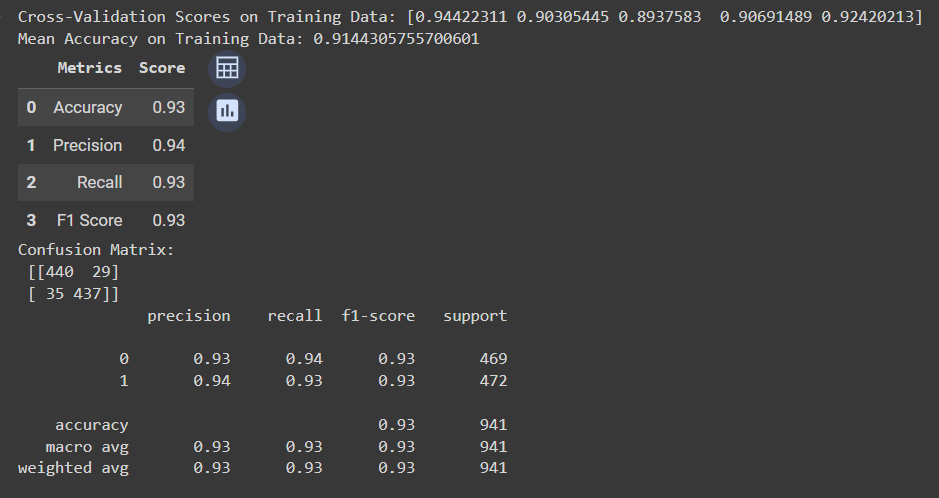

In [ ]:
# print(df_fifa_new.columns[1:].values)


ml_features = ['Value', 'Release Clause', 'Best Position', 'Preferred Foot']
print(ml_features)

ml_accuracy = 0.93
ml_f1_score = 0.93

print("Accuracy: {:.2f}%".format(ml_accuracy))
print("F1 Score: {:.2f}%".format(ml_f1_score))

['Value', 'Release Clause', 'Best Position', 'Preferred Foot']
Accuracy: 0.93%
F1 Score: 0.93%


## Submission

Once you are satisfied with the performance of your model, then you run the code block below to submit your project.


In [ ]:
# Submit Method

# Do not change the code below
question_id = "01_ml_project_features"
submit(student_id, name, assignment_id, str(ml_features), question_id, drive_link)
question_id = "02_ml_project_accuracy"
submit(student_id, name, assignment_id, str(ml_accuracy), question_id, drive_link)
question_id = "03_ml_project_f1score"
submit(student_id, name, assignment_id, str(ml_f1_score), question_id, drive_link)

'Assignment successfully submitted'

## FIN